In [1]:
import sys
sys.path.append("/home/salmon/workspace/SpDev/SpCommon")
sys.path.append("/home/salmon/workspace/SpDev/SpDB")

from spdm.util.logger import logger
from spdm.data import Collection
import matplotlib.pyplot as plt
import numpy as np
 

In [2]:
# db = Collection("mapping://",
#                     source="mdsplus:///home/salmon/public_data/efit_east",
#                     id_hasher="{shot}",  #
#                     mapping=[
#                         "/home/salmon/workspace/SpDev/SpDB/mapping/EAST/imas/3/static/config.xml",
#                         "/home/salmon/workspace/SpDev/SpDB/mapping/EAST/imas/3/dynamic/config.xml"
#                     ])
db = Collection("EAST:///home/salmon/public_data/~t")

entry = db.open(shot=55555).entry



2020-10-20 09:01:52,777 DEBUG [spdm] /home/salmon/workspace/SpDev/SpCommon/spdm/util/sp_export.py:73:sp_find_module: spdm.data.plugins.PluginEAST#EASTCollection
2020-10-20 09:01:52,778 INFO [spdm] /home/salmon/workspace/SpDev/SpDB/spdm/data/Plugin.py:70:find_plugin: Load Plugin: EASTCollection
2020-10-20 09:01:52,780 DEBUG [spdm] /home/salmon/workspace/SpDev/SpDB/spdm/data/Collection.py:49:__init__: Open EASTCollection : URISplitResult(schema='EAST', authority='', path='/home/salmon/public_data/~t', query=None, fragment=None)
2020-10-20 09:01:52,792 DEBUG [spdm] /home/salmon/workspace/SpDev/SpCommon/spdm/util/sp_export.py:73:sp_find_module: spdm.data.plugins.PluginXML#XMLDocument
2020-10-20 09:01:52,793 INFO [spdm] /home/salmon/workspace/SpDev/SpDB/spdm/data/Plugin.py:70:find_plugin: Load Plugin: XMLDocument
2020-10-20 09:01:52,795 DEBUG [spdm] /home/salmon/workspace/SpDev/SpDB/spdm/data/plugins/PluginXML.py:63:load_xml: Loading XML file from /home/salmon/workspace/SpDev/SpDB/mapping/E

In [3]:
# doc = open_xml(["/home/salmon/workspace/SpDev/SpDB/mapping/EAST/imas/3/static"])
# entry = doc.entry

fg=plt.figure()


for coil in entry.pf_active.coil:
    rect=coil.element[0].geometry.rectangle.__value__()
    plt.gca().add_patch(plt.Rectangle((rect.r-rect.width/2.0,rect.z-rect.height/2.0),rect.width,rect.height,fill=False))

plt.gca().add_patch(plt.Polygon(np.array([entry.wall.description_2d.vessel.annular.outline_outer.r.__value__(),    
                                          entry.wall.description_2d.vessel.annular.outline_outer.z.__value__()]).transpose([1,0]),
                                fill=False,closed=True))

plt.gca().add_patch(plt.Polygon(np.array([entry.wall.description_2d.vessel.annular.outline_inner.r.__value__(),    
                                          entry.wall.description_2d.vessel.annular.outline_inner.z.__value__()]).transpose([1,0]),
                                fill=False,closed=True))

plt.gca().add_patch(plt.Polygon(np.array([entry.wall.description_2d[0].limiter.unit[0].outline.r.__value__(),
                                          entry.wall.description_2d[0].limiter.unit[0].outline.z.__value__()]).transpose([1,0]),
                                fill=False,closed=True))

plt.contour(
    entry.equilibrium.time_slice[1].profiles_2d.grid.dim1.__value__(),
    entry.equilibrium.time_slice[1].profiles_2d.grid.dim2.__value__(),
    entry.equilibrium.time_slice[1].profiles_2d.psi.__value__(),
    levels =30,linewidths=0.4
    )
for time_slice in entry.equilibrium.time_slice[0:10]:
        plt.contour(
            time_slice.profiles_2d[0].grid.dim1.__value__(),
            time_slice.profiles_2d[0].grid.dim2.__value__(),
            time_slice.profiles_2d[0].psi.__value__(),
            levels=30, linewidths=0.4
        )
plt.axis('scaled')
plt.show()

AssertionError: 

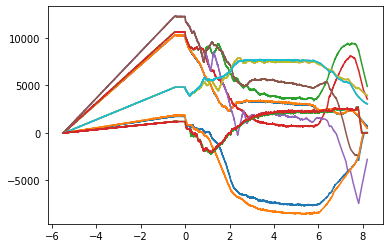

In [5]:
fg2=plt.figure()

for coil in entry.pf_active.coil:
    # print(coil.current.time.__value__())
    plt.plot(coil.current.time.__value__(), coil.current.data.__value__() )
fg2.show()